In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Análisis exploratorio de los datos de aportes diarios**

In [2]:
# descarga de los aportes diarios desde el 2000 hasta 2019
temp_aportes_diario = pd.DataFrame({'Fecha' : []})
for year in range(2000, 2020):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Aportes/Aportes_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_aportes_diario = pd.concat([temp_aportes_diario, new_data])
    temp_aportes_diario = temp_aportes_diario.drop(['Unnamed: 0'],axis=1)
temp_aportes_diario['Aportes Energía gWh'] = temp_aportes_diario['Aportes Energía kWh']/1000000
temp_aportes_diario['Aportes %'] = temp_aportes_diario['Aportes %']*100

In [3]:
# descarga de los aportes diarios desde el 2020 hasta 2021
temp_aportes_diario_2 = pd.DataFrame({'Fecha' : []})
for year in range(2020, 2022):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Aportes_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_aportes_diario_2 = pd.concat([temp_aportes_diario_2, new_data])
    temp_aportes_diario_2 = temp_aportes_diario_2.drop(['Unnamed: 0'],axis=1)
temp_aportes_diario_2['Aportes Energía gWh'] = temp_aportes_diario_2['Aportes Energía kWh']/1000000
temp_aportes_diario_2['Aportes %'] = temp_aportes_diario_2['Aportes %']*100

In [4]:
df_ap = pd.concat([temp_aportes_diario,temp_aportes_diario_2])

In [5]:
df_ap.tail(2)

,Fecha,Region Hidrologica,Nombre Río,Aportes Caudal m3/s,Aportes Energía kWh,Aportes %,Aportes Energía gWh
6662,2021-07-15,VALLE,DIGUA,19.82,287200.0,95.733333,0.2872
6663,2021-07-15,VALLE,FLORIDA II,12.90,258000.0,43.000000,0.2580


In [6]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204858 entries, 0 to 6663
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Fecha                204858 non-null  object 
 1   Region Hidrologica   204858 non-null  object 
 2   Nombre Río           204858 non-null  object 
 3   Aportes Caudal m3/s  196704 non-null  float64
 4   Aportes Energía kWh  202416 non-null  float64
 5   Aportes %            202359 non-null  float64
 6   Aportes Energía gWh  202416 non-null  float64
dtypes: float64(4), object(3)
memory usage: 12.5+ MB


In [7]:
df_ap['Fecha'] = pd.to_datetime(df_ap['Fecha'])

In [8]:
# 

# creando las columnas dias, meses y años
df_ap['Year'] = df_ap['Fecha'].dt.year
df_ap['Month'] = df_ap['Fecha'].dt.month_name()
df_ap['Weekday Name'] = df_ap['Fecha'].dt.day_name()

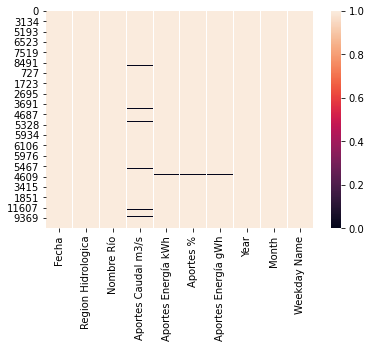

In [9]:
sns.heatmap(df_ap.notna())

In [10]:
df_ap.isnull().sum()

Fecha                     0
Region Hidrologica        0
Nombre Río                0
Aportes Caudal m3/s    8154
Aportes Energía kWh    2442
Aportes %              2499
Aportes Energía gWh    2442
Year                      0
Month                     0
Weekday Name              0
dtype: int64

In [11]:
df_ap

,Fecha,Region Hidrologica,Nombre Río,Aportes Caudal m3/s,Aportes Energía kWh,Aportes %,Aportes Energía gWh,Year,Month,Weekday Name
0,2000-01-01,ANTIOQUIA,A. SAN LORENZO,18.50,3924500.0,65.082919,3.9245,2000,January,Saturday
1,2000-01-01,ANTIOQUIA,CONCEPCION,5.37,1103300.0,110.330000,1.1033,2000,January,Saturday
2,2000-01-01,ANTIOQUIA,"DESV. EEPPM (NEC,PAJ,DOL)",9.98,2050500.0,130.605096,2.0505,2000,January,Saturday
3,2000-01-01,ANTIOQUIA,GRANDE,28.03,5192100.0,120.187500,5.1921,2000,January,Saturday
4,2000-01-01,ANTIOQUIA,GUADALUPE,15.82,3250400.0,112.861111,3.2504,2000,January,Saturday
...,...,...,...,...,...,...,...,...,...,...
6659,2021-07-15,VALLE,ALTOANCHICAYA,24.06,2413200.0,77.099042,2.4132,2021,July,Thursday
6660,2021-07-15,VALLE,CALIMA,5.01,221200.0,61.444444,0.2212,2021,July,Thursday
6661,2021-07-15,VALLE,CAUCA SALVAJINA,104.73,2174900.0,103.566667,2.1749,2021,July,Thursday
6662,2021-07-15,VALLE,DIGUA,19.82,287200.0,95.733333,0.2872,2021,July,Thursday


In [20]:
df_ap['Region Hidrologica'].value_counts()

ANTIOQUIA         94537
VALLE             38271
CENTRO            33430
ORIENTE           23601
RIOS ESTIMADOS     7867
CARIBE             7152
Name: Region Hidrologica, dtype: int64

In [21]:
list_of_regions = df_ap['Region Hidrologica'].unique()

In [37]:
df_Antioquia = df_ap[df_ap['Region Hidrologica'] == 'ANTIOQUIA']
df_Valle = df_ap[df_ap['Region Hidrologica'] == 'VALLE']
df_Centro = df_ap[df_ap['Region Hidrologica'] == 'CENTRO']
df_Oriente = df_ap[df_ap['Region Hidrologica'] == 'ORIENTE']
df_Rios = df_ap[df_ap['Region Hidrologica'] == 'RIOS ESTIMADOS']
df_Caribe = df_ap[df_ap['Region Hidrologica'] == 'CARIBE']

In [44]:
ts_Antioquia = df_Antioquia[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Antioquia.Fecha).agg({'Aportes Caudal m3/s': 'sum', 'Aportes Energía kWh': 'sum', 'Aportes %' : 'mean'})
ts_Valle = df_Valle[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Valle.Fecha).agg({'Aportes Caudal m3/s': 'sum', 'Aportes Energía kWh': 'sum', 'Aportes %' : 'mean'})
ts_Centro = df_Centro[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Centro.Fecha).agg({'Aportes Caudal m3/s': 'sum', 'Aportes Energía kWh': 'sum', 'Aportes %' : 'mean'})
ts_Oriente = df_Oriente[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Oriente.Fecha).agg({'Aportes Caudal m3/s': 'sum', 'Aportes Energía kWh': 'sum', 'Aportes %' : 'mean'})
ts_Rios = df_Rios[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Rios.Fecha).agg({'Aportes Caudal m3/s': 'sum', 'Aportes Energía kWh': 'sum', 'Aportes %' : 'mean'})
ts_Caribe = df_Caribe[['Aportes Caudal m3/s','Aportes Energía kWh','Aportes %']].groupby(df_Caribe.Fecha).agg({'Aportes Caudal m3/s': 'sum', 'Aportes Energía kWh': 'sum', 'Aportes %' : 'mean'})

In [45]:
ts_Antioquia.columns

Index(['Aportes Caudal m3/s', 'Aportes Energía kWh', 'Aportes %'], dtype='object')

In [46]:
renaming_columns_by_region = []
for i in list_of_regions:
  x = [f'Aportes Caudal m3/s_{i}', f'Aportes Energía kWh_{i}', f'Aportes %_{i}']
  renaming_columns_by_region.append(x)

In [47]:
ts_Antioquia.columns = renaming_columns_by_region[0]
ts_Valle.columns = renaming_columns_by_region[1]
ts_Centro.columns = renaming_columns_by_region[2]
ts_Oriente.columns = renaming_columns_by_region[3]
ts_Rios.columns = renaming_columns_by_region[4]
ts_Caribe.columns = renaming_columns_by_region[5]

In [67]:
merge1 = ts_Antioquia.merge(ts_Valle, how = 'left', on = 'Fecha')
merge2 = merge1.merge(ts_Centro, how = 'left', on = 'Fecha' )
merge3 = merge2.merge(ts_Oriente, how = 'left', on = 'Fecha' )
merge4 = merge3.merge(ts_Rios, how = 'left', on = 'Fecha' )
ts_hydrology = merge4.merge(ts_Caribe, how = 'left', on = 'Fecha' )
ts_hydrology

,Aportes Caudal m3/s_ANTIOQUIA,Aportes Energía kWh_ANTIOQUIA,Aportes %_ANTIOQUIA,Aportes Caudal m3/s_CENTRO,Aportes Energía kWh_CENTRO,Aportes %_CENTRO,Aportes Caudal m3/s_ORIENTE,Aportes Energía kWh_ORIENTE,Aportes %_ORIENTE,Aportes Caudal m3/s_RIOS ESTIMADOS,Aportes Energía kWh_RIOS ESTIMADOS,Aportes %_RIOS ESTIMADOS,Aportes Caudal m3/s_VALLE,Aportes Energía kWh_VALLE,Aportes %_VALLE,Aportes Caudal m3/s_CARIBE,Aportes Energía kWh_CARIBE,Aportes %_CARIBE
Fecha,,,,,,,,,,,,,,,,,,
2000-01-01,161.950,35761700.0,103.338158,269.15,6374400.0,167.084110,263.180,6251200.0,79.550387,24.820,5426200.0,66.683622,0.0,2863800.0,99.437500,NaN,NaN,NaN
2000-01-02,162.850,36098500.0,103.143176,312.32,7495900.0,214.305873,273.630,4039200.0,65.623777,19.540,4122400.0,53.845373,0.0,2889200.0,100.319444,NaN,NaN,NaN
2000-01-03,149.780,33240200.0,95.339116,332.54,7918500.0,215.255583,236.890,3580600.0,54.292297,38.290,9751600.0,173.175673,0.0,2997400.0,104.076389,NaN,NaN,NaN
2000-01-04,153.830,34397800.0,99.596661,285.62,6689400.0,161.847195,275.920,8941400.0,113.558167,24.560,5338000.0,66.629922,0.0,3051600.0,105.958333,NaN,NaN,NaN
2000-01-05,162.470,35616100.0,103.625248,254.04,6027100.0,159.883272,265.980,7182200.0,93.025516,47.360,11044300.0,164.150632,0.0,3169800.0,110.062500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-11,975.252,184621600.0,226.941886,184.32,5623800.0,82.374684,1595.075,68682200.0,114.022873,304.426,64419800.0,86.246687,0.0,3845500.0,158.904959,539.56,5967100.0,110.501852
2021-07-12,400.902,75146300.0,104.844742,213.98,7104400.0,122.197656,1474.091,60002400.0,101.730205,333.952,73941500.0,110.832046,0.0,2527400.0,104.438017,489.60,5414600.0,100.270370
2021-07-13,407.940,77670500.0,99.592686,192.03,6035500.0,96.754344,1528.421,62774500.0,107.439366,358.917,79140600.0,122.425052,0.0,2686300.0,111.004132,809.40,8951300.0,165.764815


In [52]:
list_of_regions

array(['ANTIOQUIA', 'CENTRO', 'ORIENTE', 'RIOS ESTIMADOS', 'VALLE',
       'CARIBE'], dtype=object)

In [59]:
ts_hydrology['Caudal'] = ts_hydrology['Aportes Caudal m3/s_ANTIOQUIA'].fillna(0) + ts_hydrology['Aportes Caudal m3/s_CENTRO'].fillna(0) + ts_hydrology['Aportes Caudal m3/s_ORIENTE'].fillna(0) + ts_hydrology['Aportes Caudal m3/s_RIOS ESTIMADOS'].fillna(0) + ts_hydrology['Aportes Caudal m3/s_VALLE'].fillna(0) + ts_hydrology['Aportes Caudal m3/s_CARIBE'].fillna(0)
ts_hydrology['Energia'] = ts_hydrology['Aportes Energía kWh_ANTIOQUIA'].fillna(0) + ts_hydrology['Aportes Energía kWh_CENTRO'].fillna(0) + ts_hydrology['Aportes Energía kWh_ORIENTE'].fillna(0) + ts_hydrology['Aportes Energía kWh_RIOS ESTIMADOS'].fillna(0) + ts_hydrology['Aportes Energía kWh_VALLE'].fillna(0) + ts_hydrology['Aportes Energía kWh_CARIBE'].fillna(0)

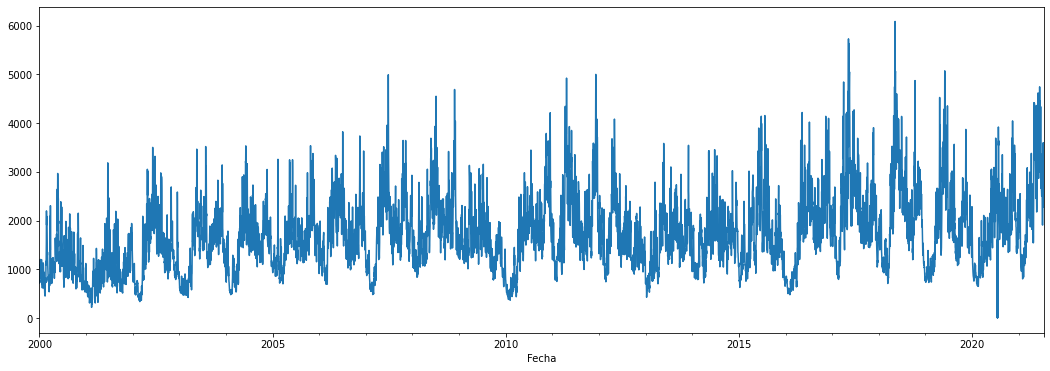

In [60]:
ts_hydrology['Caudal'].plot(figsize=(18, 6))

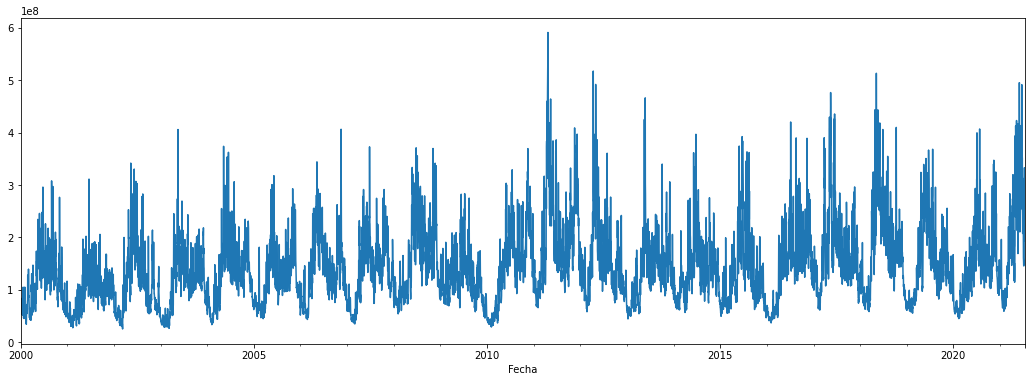

In [61]:
ts_hydrology['Energia'].plot(figsize=(18, 6))

In [68]:
ts_hydrology = ts_hydrology.reset_index()
ts_hydrology

,Fecha,Aportes Caudal m3/s_ANTIOQUIA,Aportes Energía kWh_ANTIOQUIA,Aportes %_ANTIOQUIA,Aportes Caudal m3/s_CENTRO,Aportes Energía kWh_CENTRO,Aportes %_CENTRO,Aportes Caudal m3/s_ORIENTE,Aportes Energía kWh_ORIENTE,Aportes %_ORIENTE,Aportes Caudal m3/s_RIOS ESTIMADOS,Aportes Energía kWh_RIOS ESTIMADOS,Aportes %_RIOS ESTIMADOS,Aportes Caudal m3/s_VALLE,Aportes Energía kWh_VALLE,Aportes %_VALLE,Aportes Caudal m3/s_CARIBE,Aportes Energía kWh_CARIBE,Aportes %_CARIBE
0,2000-01-01,161.950,35761700.0,103.338158,269.15,6374400.0,167.084110,263.180,6251200.0,79.550387,24.820,5426200.0,66.683622,0.0,2863800.0,99.437500,NaN,NaN,NaN
1,2000-01-02,162.850,36098500.0,103.143176,312.32,7495900.0,214.305873,273.630,4039200.0,65.623777,19.540,4122400.0,53.845373,0.0,2889200.0,100.319444,NaN,NaN,NaN
2,2000-01-03,149.780,33240200.0,95.339116,332.54,7918500.0,215.255583,236.890,3580600.0,54.292297,38.290,9751600.0,173.175673,0.0,2997400.0,104.076389,NaN,NaN,NaN
3,2000-01-04,153.830,34397800.0,99.596661,285.62,6689400.0,161.847195,275.920,8941400.0,113.558167,24.560,5338000.0,66.629922,0.0,3051600.0,105.958333,NaN,NaN,NaN
4,2000-01-05,162.470,35616100.0,103.625248,254.04,6027100.0,159.883272,265.980,7182200.0,93.025516,47.360,11044300.0,164.150632,0.0,3169800.0,110.062500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7862,2021-07-11,975.252,184621600.0,226.941886,184.32,5623800.0,82.374684,1595.075,68682200.0,114.022873,304.426,64419800.0,86.246687,0.0,3845500.0,158.904959,539.56,5967100.0,110.501852
7863,2021-07-12,400.902,75146300.0,104.844742,213.98,7104400.0,122.197656,1474.091,60002400.0,101.730205,333.952,73941500.0,110.832046,0.0,2527400.0,104.438017,489.60,5414600.0,100.270370
7864,2021-07-13,407.940,77670500.0,99.592686,192.03,6035500.0,96.754344,1528.421,62774500.0,107.439366,358.917,79140600.0,122.425052,0.0,2686300.0,111.004132,809.40,8951300.0,165.764815
7865,2021-07-14,334.639,61260900.0,80.083580,214.25,6434000.0,89.869849,1355.551,63837100.0,101.588566,357.226,80714200.0,117.226279,0.0,2491300.0,102.946281,563.99,6237300.0,115.505556


In [69]:
ts_hydrology.columns

Index(['Fecha', 'Aportes Caudal m3/s_ANTIOQUIA',
       'Aportes Energía kWh_ANTIOQUIA', 'Aportes %_ANTIOQUIA',
       'Aportes Caudal m3/s_CENTRO', 'Aportes Energía kWh_CENTRO',
       'Aportes %_CENTRO', 'Aportes Caudal m3/s_ORIENTE',
       'Aportes Energía kWh_ORIENTE', 'Aportes %_ORIENTE',
       'Aportes Caudal m3/s_RIOS ESTIMADOS',
       'Aportes Energía kWh_RIOS ESTIMADOS', 'Aportes %_RIOS ESTIMADOS',
       'Aportes Caudal m3/s_VALLE', 'Aportes Energía kWh_VALLE',
       'Aportes %_VALLE', 'Aportes Caudal m3/s_CARIBE',
       'Aportes Energía kWh_CARIBE', 'Aportes %_CARIBE'],
      dtype='object')

In [70]:
ts_hydrology.columns = ['Date', 'Aportes Caudal m3/s_ANTIOQUIA',
       'Aportes Energía kWh_ANTIOQUIA', 'Aportes %_ANTIOQUIA',
       'Aportes Caudal m3/s_CENTRO', 'Aportes Energía kWh_CENTRO',
       'Aportes %_CENTRO', 'Aportes Caudal m3/s_ORIENTE',
       'Aportes Energía kWh_ORIENTE', 'Aportes %_ORIENTE',
       'Aportes Caudal m3/s_RIOS ESTIMADOS',
       'Aportes Energía kWh_RIOS ESTIMADOS', 'Aportes %_RIOS ESTIMADOS',
       'Aportes Caudal m3/s_VALLE', 'Aportes Energía kWh_VALLE',
       'Aportes %_VALLE', 'Aportes Caudal m3/s_CARIBE',
       'Aportes Energía kWh_CARIBE', 'Aportes %_CARIBE']

In [71]:
ts_hydrology = ts_hydrology.set_index('Date')

In [62]:
ts_hydrology.to_csv('ts_Hydrology.csv')